In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

# Meyer functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from boostlets_mod import psi_12_fou

Estas son las funciones de Meyer que usa Soren Hauser para crear los shearlets.  
Psi_12_fou(omega) crea la funcion madre para los shearlets en el cono horizontal.  
meyerShearletSpect aplica las dilataciones y shears a las funciones base psi_12_fou.  

De momento puedo usar los shears y escalas que quiera pero no todas forman un set que cubre todo $\mathcal{R}^2$.
Además hay que definir qué pasa en los conos horizontal, vertical, X y en la zona central.

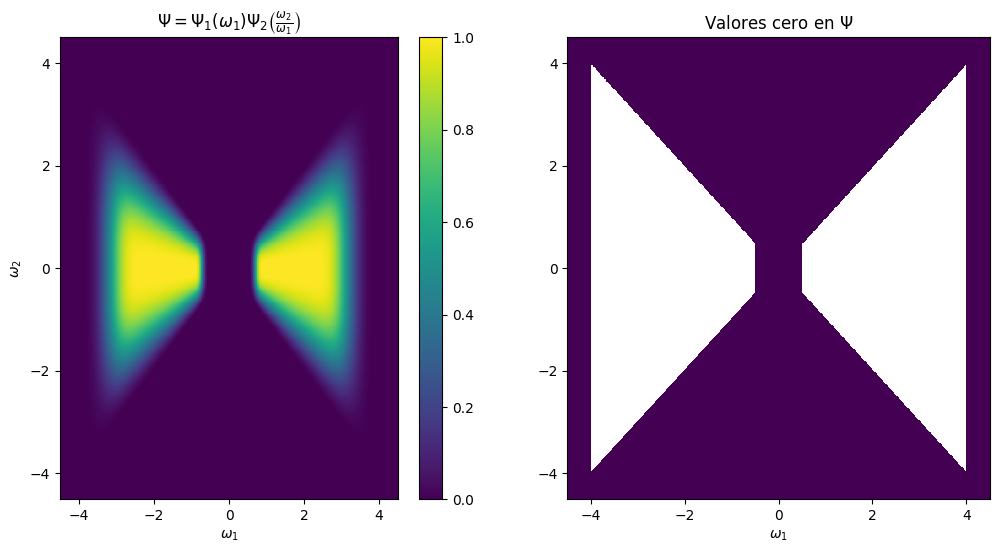

In [3]:
m = 501
n = 501

omega1 = np.linspace(-4.5, 4.5, n)
omega2 = np.linspace(-4.5, 4.5, m)
omega1_grid, omega2_grid = np.meshgrid(omega1, omega2)
psi_fou_plane = psi_12_fou(omega1_grid, omega2_grid)

# Graficar el resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Colormap de psi_fou_plane
c1 = ax1.pcolor(omega1, omega2, psi_fou_plane, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title(r'$\Psi=\Psi_1(\omega_1)\Psi_2\left(\frac{\omega_2}{\omega_1}\right)$')
ax1.set_xlabel(r'$\omega_1$')
ax1.set_ylabel(r'$\omega_2$')

# Segundo gráfico: Valores cero en psi_fou_plane
psi_fou_plane_zero = np.where(psi_fou_plane == 0, 1, np.nan)
c2 = ax2.pcolor(omega1, omega2, psi_fou_plane_zero, shading='auto')
ax2.set_title(r'Valores cero en $\Psi$')
ax2.set_xlabel(r'$\omega_1$')

plt.show()



## Meyer scaling and wavelet functions
+ Los intervalos en los que lo define Elías son distintos de los que vienen en la wikipedia.  
+ En los que define Elías, no hay solape entre scaling y wavelet functions. 
+ En la wikipedia los intervalos si que se solapan con un sin() y un cos().
+ La suma de los cuadrados no suma 1


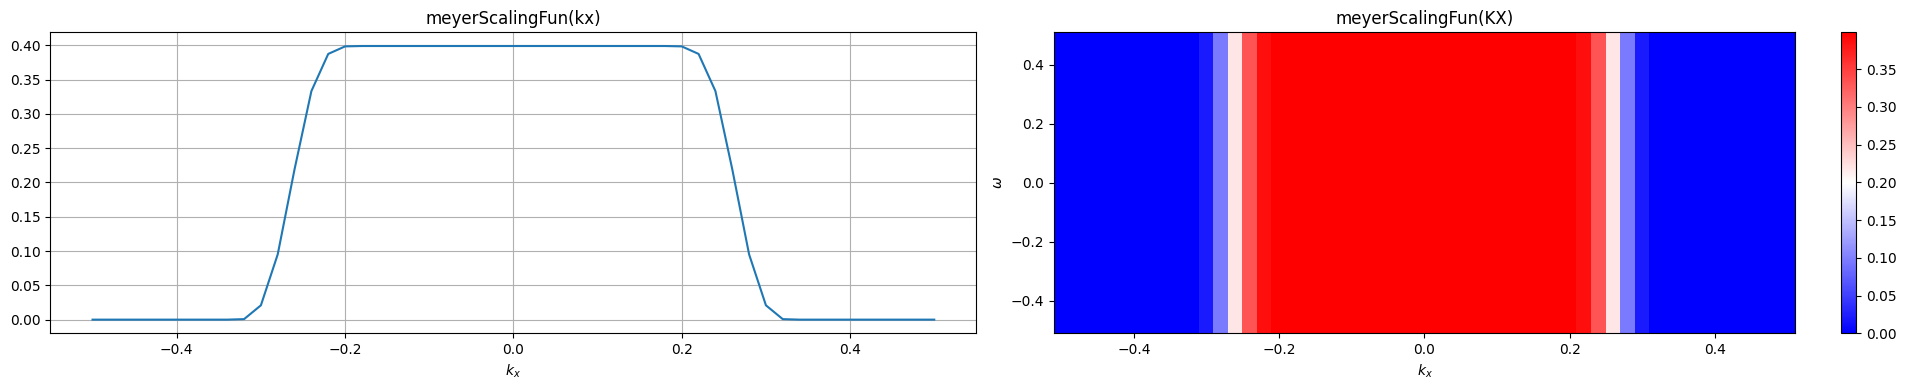

In [4]:
# Scaling Function de Meyer 
from boostlets_mod import meyeraux, meyerScalingFun

omega = np.linspace(-0.5, 0.5, 51)
kx = np.linspace(-0.5, 0.5, 51)
KX, OM = np.meshgrid(kx, omega)

MS_kx = meyerScalingFun(kx)
MS_KX = meyerScalingFun(KX)

fig, ax = plt.subplots(1,2, figsize=(4*5,4))
# Primer gráfico (ax[0])
c0 = ax[0].plot(kx, MS_kx)
ax[0].set_xlabel('$k_x$')
ax[0].set_title('meyerScalingFun(kx)')
ax[0].grid(True)

# Segundo gráfico (ax[1])
c1 = ax[1].pcolor(kx, omega, MS_KX, shading='auto', cmap='bwr')
ax[1].set_title('meyerScalingFun(KX)')
ax[1].set_xlabel('$k_x$')
ax[1].set_ylabel(r'$\omega$')
fig.colorbar(c1, ax=ax[1], orientation='vertical')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
# Mostrar el gráfico
plt.show()



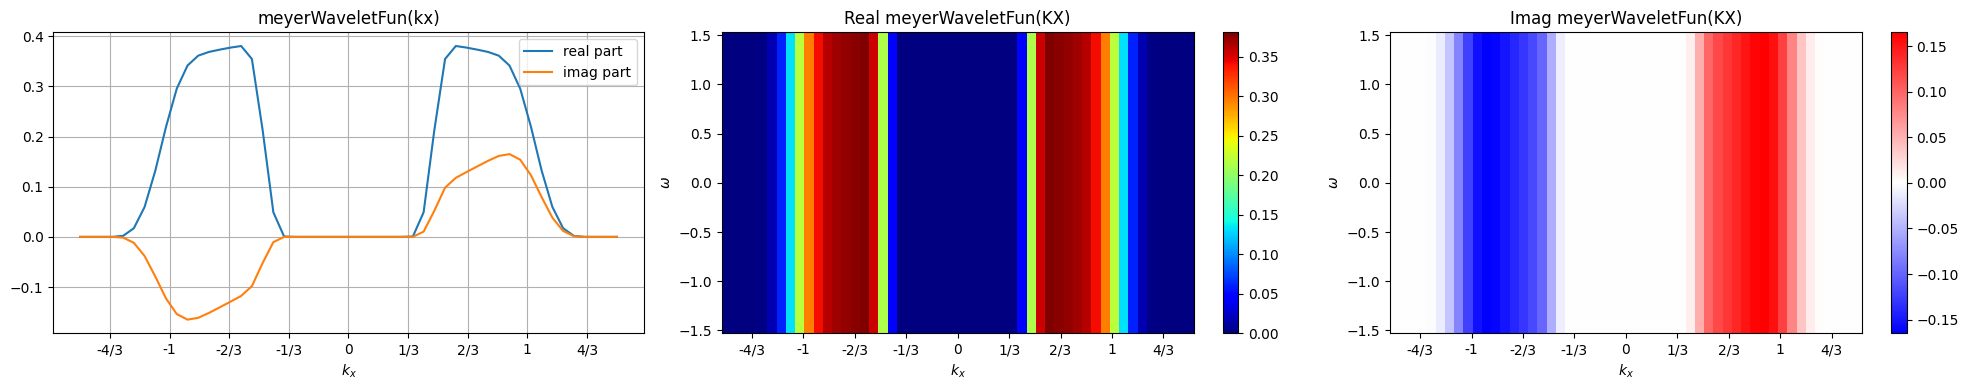

In [5]:

import numpy as np
from boostlets_mod import meyerWaveletFun

# Ejemplo de uso:

omega = np.linspace(-1.5, 1.5, 51)
kx = np.linspace(-1.5, 1.5, 51)
KX, OM = np.meshgrid(kx, omega)

MW_kx = meyerWaveletFun(kx)
MW_KX = meyerWaveletFun(KX)

xticks_pos = np.arange(-4/3, 5/3, 1/3)
xticks_lbls = ["-4/3", "-1", "-2/3", "-1/3", "0", "1/3", "2/3", "1", "4/3" ]

fig, ax = plt.subplots(1,3, figsize=(4*5,4))
ax[0].plot(kx, MW_kx.real, label='real part')
ax[0].plot(kx, MW_kx.imag, label='imag part')
ax[0].set_xlabel('$k_x$')
ax[0].set_title('meyerWaveletFun(kx)')
ax[0].grid(True)
ax[0].legend()
ax[0].set_xticks(xticks_pos, xticks_lbls)

c1 = ax[1].pcolor(kx, omega, MW_KX.real, shading='auto', cmap='jet')
ax[1].set_title('Real meyerWaveletFun(KX)')
ax[1].set_xlabel('$k_x$')
ax[1].set_ylabel(r'$\omega$')
ax[1].set_xticks(xticks_pos, xticks_lbls)
fig.colorbar(c1, ax=ax[1], orientation='vertical')

c1 = ax[2].pcolor(kx, omega, MW_KX.imag, shading='auto', cmap='bwr')
ax[2].set_title('Imag meyerWaveletFun(KX)')
ax[2].set_xlabel('$k_x$')
ax[2].set_ylabel(r'$\omega$')
ax[2].set_xticks(xticks_pos, xticks_lbls)
fig.colorbar(c1, ax=ax[2], orientation='vertical')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

## MeyerWavelets, do they add to 1 at differet scales?

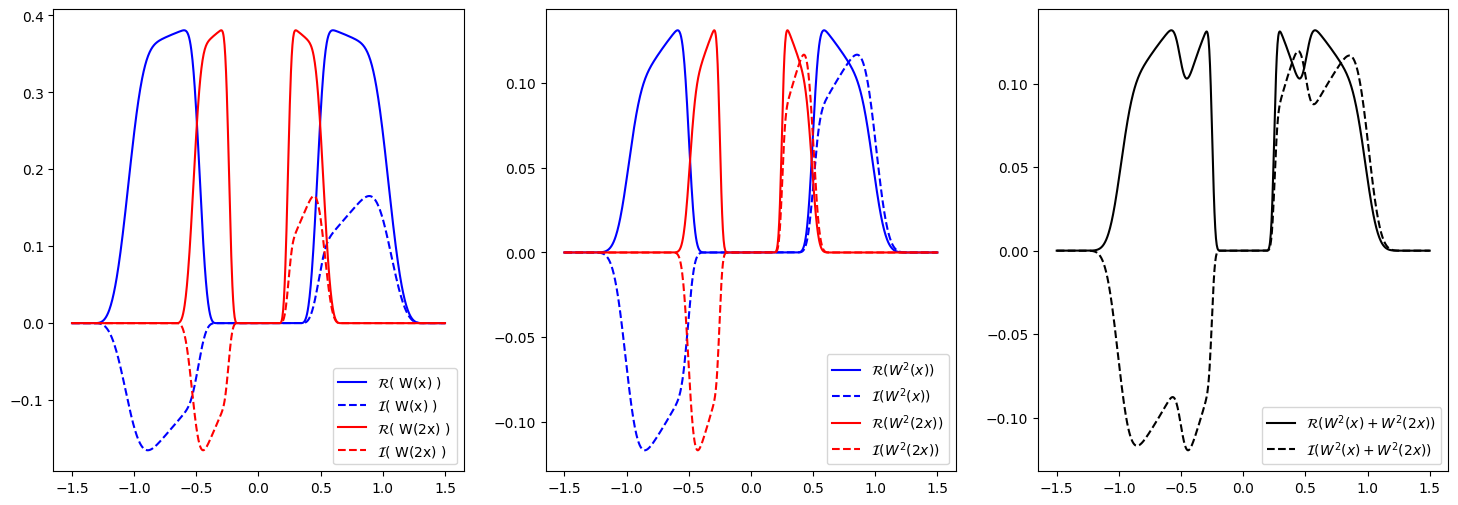

In [6]:
x = np.linspace(-1.5, 1.5, 1001)
w1 = meyerWaveletFun(x)
w2 = meyerWaveletFun(2*x)

fig, ax = plt.subplots(1,3, figsize=(6*3,6))
ax[0].plot(x, w1.real, 'b-',  label=r'$\mathcal{R}$( W(x) )')
ax[0].plot(x, w1.imag, 'b--', label=r'$\mathcal{I}$( W(x) )')
ax[0].plot(x, w2.real, 'r-',  label=r'$\mathcal{R}$( W(2x) )')
ax[0].plot(x, w2.imag, 'r--', label=r'$\mathcal{I}$( W(2x) )')

ax[1].plot(x, (w1**2).real, 'b-',  label=r'$\mathcal{R}( W^2(x) )$')
ax[1].plot(x, (w1**2).imag, 'b--', label=r'$\mathcal{I}( W^2(x) )$')
ax[1].plot(x, (w2**2).real, 'r-',  label=r'$\mathcal{R}( W^2(2x) )$')
ax[1].plot(x, (w2**2).imag, 'r--', label=r'$\mathcal{I}( W^2(2x) )$')

ax[2].plot(x, (w1**2 + w2**2).real, 'k-',  label=r'$\mathcal{R}( W^2(x)+W^2(2x) )$')
ax[2].plot(x, (w1**2 + w2**2).imag, 'k--', label=r'$\mathcal{I}( W^2(x)+W^2(2x) )$')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()



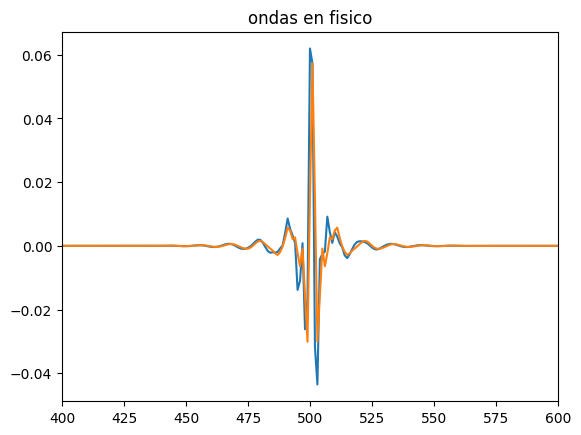

In [7]:

a = np.fft.ifftshift(w1**2 + w2**2)
xa = np.fft.ifftshift(x)

fis_w1_r = np.fft.ifft(a.real)
fis_w1 = np.fft.ifft(a)

fis_w1 = np.fft.ifftshift(fis_w1)
fis_w1_r = np.fft.ifftshift(fis_w1_r)

plt.plot(fis_w1.real)
plt.plot(fis_w1_r.real)

ax = plt.gca()
ax.set_xlim((400, 600))
plt.title("ondas en fisico")
plt.show()



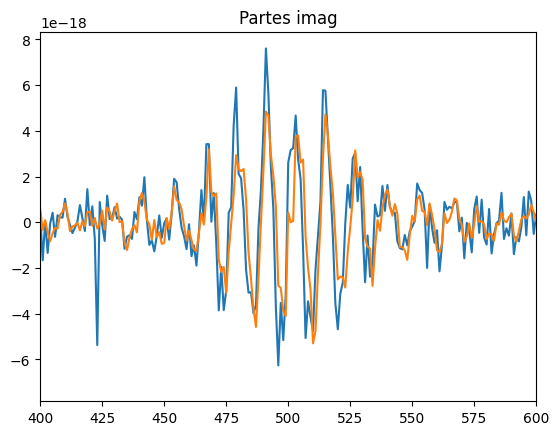

In [8]:
plt.plot(fis_w1.imag)
plt.plot(fis_w1_r.imag)
plt.title("Partes imag")
ax = plt.gca()
ax.set_xlim((400, 600))

plt.show()


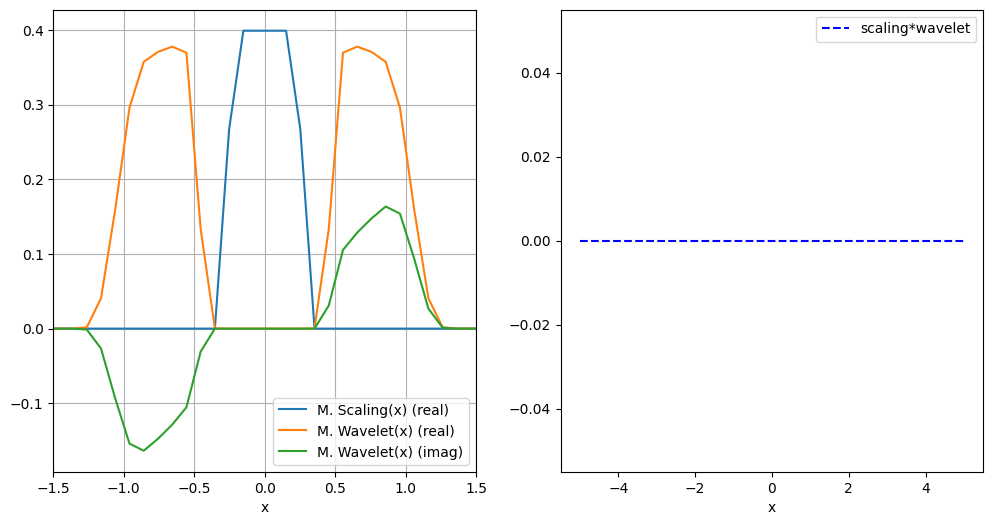

In [9]:

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z1_s = meyerScalingFun(x)
z1_w = meyerWaveletFun(x)

fig, ax = plt.subplots(1,2, figsize=(2*6,6))
ax[0].plot(x, z1_s.real, label='M. Scaling(x) (real)')
ax[0].plot(x, z1_w.real, label='M. Wavelet(x) (real)')
ax[0].plot(x, z1_w.imag, label='M. Wavelet(x) (imag)')
# plt.plot(x, z1_s.real+z1_w.real, 'k--', label='M. Wavelet')
ax[1].plot(x, (z1_s*z1_w).real, 'b--', label='scaling*wavelet')

ax[0].set_xlim((-1.5,1.5))
ax[0].grid('on')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

ax[0].legend()
ax[1].legend()

plt.show()



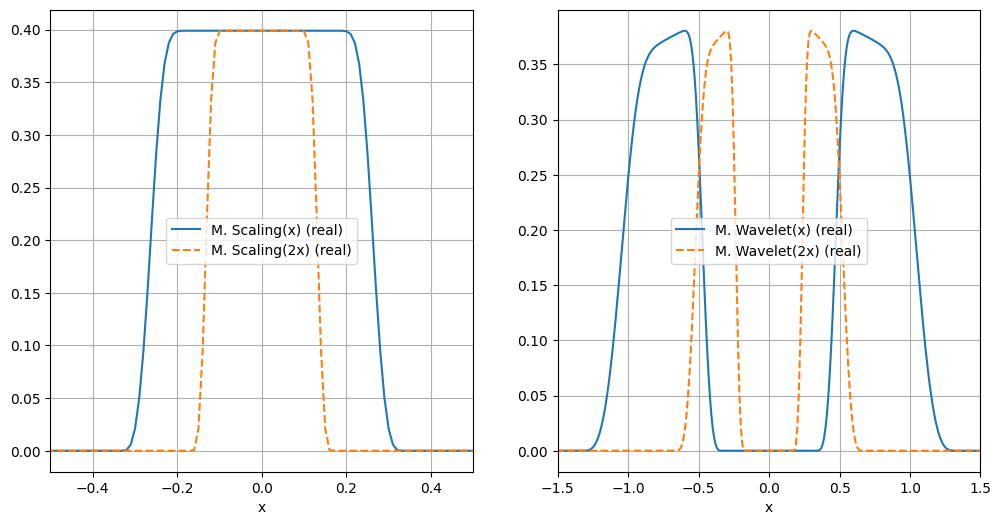

In [10]:
m = 256
n = 100

# width of freq-scale bands 

x = np.linspace(-5, 5, 1001)
y = np.linspace(-5, 5, 1001)

z1_s = meyerScalingFun(x)
z1_w = meyerWaveletFun(x)
z2_s = meyerScalingFun(2*x)
z2_w = meyerWaveletFun(2*x)

fig, ax = plt.subplots(1,2, figsize=(2*6,6))
ax[0].plot(x, z1_s.real, '-', label='M. Scaling(x) (real)')
ax[0].plot(x, z2_s.real, '--', label='M. Scaling(2x) (real)')

ax[1].plot(x, z1_w.real, '-', label='M. Wavelet(x) (real)')
ax[1].plot(x, z2_w.real, '--', label='M. Wavelet(2x) (real)')

# ax[0].plot(x, z1_w.imag, label='M. Wavelet(x) (imag)')
# plt.plot(x, z1_s.real+z1_w.real, 'k--', label='M. Wavelet')
# ax[1].plot(x, (z1_s*z1_w).real, 'b--', label='scaling*wavelet')

ax[0].set_xlim((-0.5,0.5))
ax[0].grid('on')

ax[1].set_xlim((-1.5,1.5))
ax[1].grid('on')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

ax[0].legend()
ax[1].legend()

plt.show()



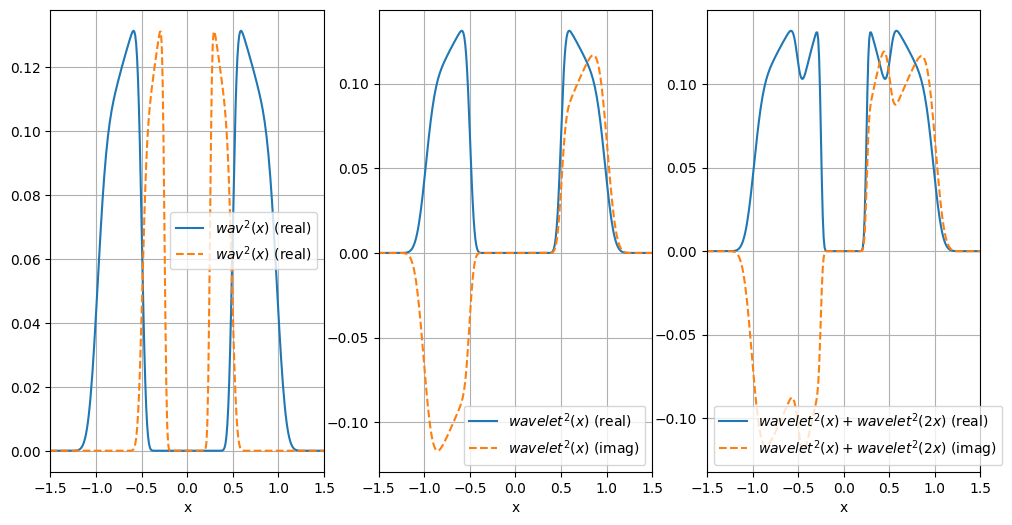

In [11]:
x = np.linspace(-5, 5, 1001)
y = np.linspace(-5, 5, 1001)

z1_s = meyerScalingFun(x)
z1_w = meyerWaveletFun(x)
z2_s = meyerScalingFun(2*x)
z2_w = meyerWaveletFun(2*x)

fig, ax = plt.subplots(1,3, figsize=(2*6,6))
ax[0].plot(x, (z1_w*z1_w).real, '-', label=r'$wav^2(x)$ (real)')
ax[0].plot(x, (z2_w*z2_w).real, '--', label=r'$wav^2(x)$ (real)')

ax[1].plot(x, (z1_w*z1_w).real, '-', label=r'$wavelet^2(x)$ (real)')
ax[1].plot(x, (z1_w*z1_w).imag, '--', label=r'$wavelet^2(x)$ (imag)')

ax[2].plot(x, ((z1_w*z1_w)+(z2_w*z2_w)).real, '-', label=r'$wavelet^2(x)+wavelet^2(2x)$ (real)')
ax[2].plot(x, ((z1_w*z1_w)+(z2_w*z2_w)).imag, '--', label=r'$wavelet^2(x)+wavelet^2(2x)$ (imag)')

ax[0].set_xlim((-1.5,1.5))
ax[0].grid('on')

ax[1].set_xlim((-1.5,1.5))
ax[1].grid('on')

ax[2].set_xlim((-1.5,1.5))
ax[2].grid('on')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()




# Meyer system
Desarrollo un sistema de wavelets que pueda usar en boostlets y me sumen 1 en todo el dominio

(0.1, 1)


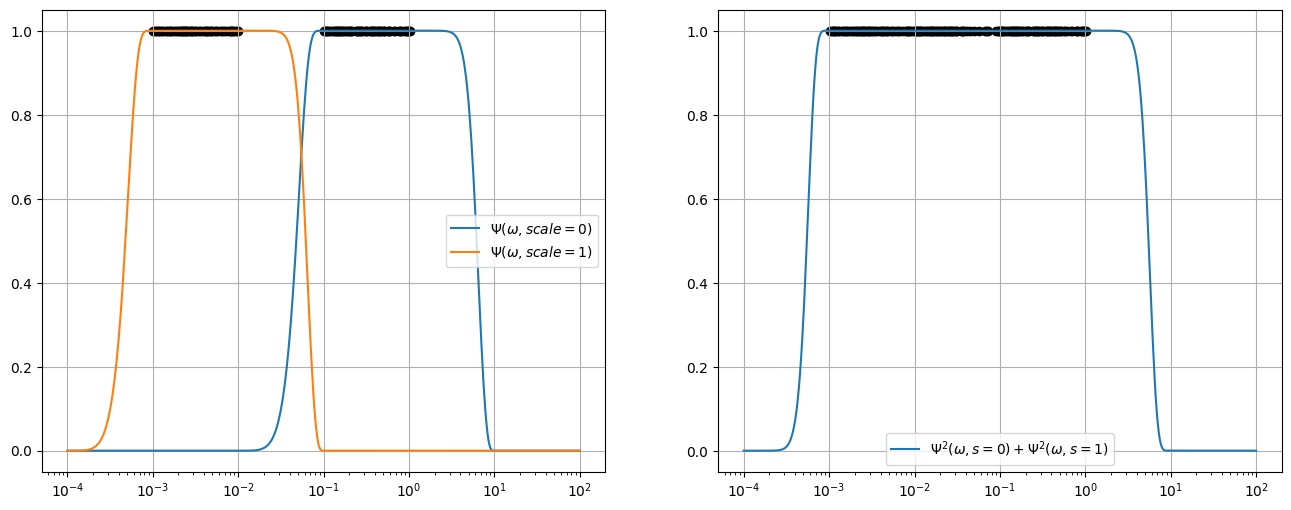

In [12]:
from boostlets_mod import Meyer_system
b_point, alpha = 1, 0.1

ms = Meyer_system(b_point=b_point, alpha=alpha)
ms_ones = ms.ones_system(scale=0)
print(ms_ones)

om = np.logspace(-4, 1.5, 501)

om = np.logspace(-2, 4, 501, base=alpha)

b = ms.b_om(om)
psi_s0 = ms.psi_1(om, 0)
psi_s1 = ms.psi_1(om, 1)

fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].semilogx(om, psi_s0, label=r'$\Psi(\omega, scale=0)$')
ax[0].scatter(om[psi_s0 == 1.0], psi_s0[psi_s0 == 1.0], color='k')
ax[0].semilogx(om, psi_s1, label=r'$\Psi(\omega, scale=1)$')
ax[0].scatter(om[psi_s1 == 1.0], psi_s1[psi_s1 == 1.0], color='k')
ax[0].grid(True)
ax[0].legend()

sum_psi2 = psi_s0**2+psi_s1**2
ax[1].semilogx(om, sum_psi2, label=r'$\Psi^2(\omega,s=0) + \Psi^2(\omega,s=1)$')
ax[1].scatter(om[sum_psi2 == 1.0], sum_psi2[sum_psi2 == 1.0], color='k')
ax[1].grid(True)
ax[1].legend()

plt.show()



## Pruebas Meyer_system

0
(5.0, 50.0)
(0.05000000000000001, 0.5000000000000001)


[]

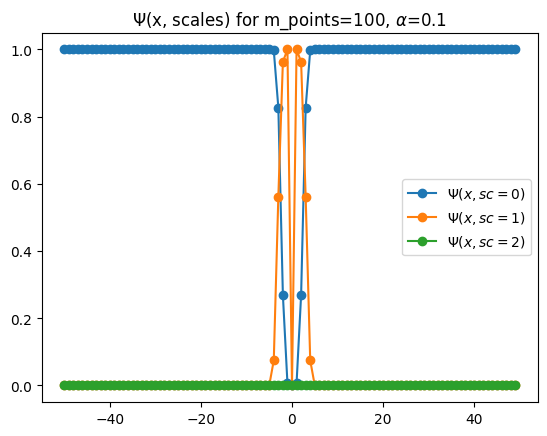

In [13]:
from boostlets_mod import Meyer_system
m, alpha = 100, 0.1
ms = Meyer_system(b_point=m/2, alpha=alpha)
s_max = ms.max_scales(m_points=m)
print(s_max)
print(ms.ones_psi_1(0))
print(ms.ones_psi_1(1))
x = np.linspace(-m/2, (m-1)//2, m)
psi_0 = ms.psi_1(x, scale=0)
psi_1 = ms.psi_1(x, scale=1)
psi_2 = ms.psi_1(x, scale=2)

plt.plot(x, psi_0, '-o', label=r'$\Psi(x, sc=0)$')
plt.plot(x, psi_1, '-o', label=r'$\Psi(x, sc=1)$')
plt.plot(x, psi_2, '-o', label=r'$\Psi(x, sc=2)$')
plt.title(rf"$\Psi$(x, scales) for m_points={m}, $\alpha$={alpha}")
plt.legend()
plt.plot()



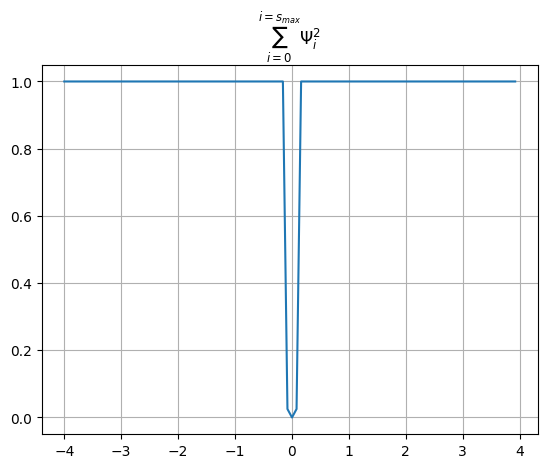

In [34]:
m, b, alpha = 100, 4, 0.5
ms = Meyer_system(b_point=b, alpha=alpha)
s_max = ms.max_scales(m_points=m)
x = ms.get_omega(m_points=m)
psi_0 = ms.psi_1(omega=x, scale=0)

psis = [ms.psi_1(omega=x, scale=s) for s in range(s_max+1)]
psis = np.array(psis)
# print(psis.shape)
sum_psi2 = np.sum(psis**2, axis=0)

plt.plot(x, sum_psi2)
plt.grid(True)
plt.title(r"$\sum_{i=0}^{i=s_{max}} \Psi_i^2 $")
plt.show()

# Pasos para boostlets:

+ $(k,\omega)$ -> boost(a, $\theta$) -> $(k_b, \omega_b)$ -> diffeo -> (Ad, Th) -> waveletes -> $\Psi = \Psi_1(Ad) \Psi_2(Th)$

+ Definir el espacio en el que se proyectara mi imagen: m filas (m  puntos en $\omega$) y n columnas (n puntos en $k$)

+ Puedo hacer por separado este analisis para cada direccion. El cono vertical puede tener un numero de escalas basado en m filas y el cono horizontal puede tener otro numero de escalas basado en "n" el numero de columnas. A partir de ahora hago el analisis para m puntos.

+ Definir los límites de $k$ y de $\omega$ según los wavelets y scaling que vaya a usar para teselar el espacio de Fourier $m$ x $n$
    - Mis escalas de wavelet se me desplazan hacia el centro, por lo que puedo establecer $\omega_{max}$ y $k_{max}$ como el punto donde el $\hat{\Psi}_1^2(\omega, scale=0)$ valga 1.  
    Por ejemplo, si uso el wavelet definido para los shearlets con $b(\omega)$: sin() $\in$ $[1,2]$ cos() $\in$ $[2,4]$, la siguiente escala superpone su cos() donde el sin() $\in$ $[1,2]$,
    por lo que elegiría $\omega_{max}$ en 2, que es el punto  más externo para el que $\hat{\Psi}_1^2(\omega=\omega_{max}, scale=0)=1$.
    - La escala 0 tiene 1 en la banda: $b[\alpha, 1]$
    - La escala 1 tiene 1 en la banda: $b[\alpha^3, \alpha^2]$
    - La escala 2 tiene 1 en la banda: $b[\alpha^5, \alpha^4]$
    - La escala s tiene 1 en la banda: $b[\alpha^{2s+1}, \alpha^{2s}]$
+ Por puntos, si tengo m filas, tendré la mitad en $\omega$ negativos y la otra en $\omega$ positivos.
    - m/2 puntos son $\omega$ positivos
    - El b, que el $\omega_{max}$ será m/2
    - El punto más pequeño de los wavelets será $\omega_{min}=b\alpha^{2s+1}$
    - Intentamos que el $\omega_{min}>1$, es decir, que el primer punto despues de $\omega=0$ pertenezca todavía al scaling function
    y no al wavelet de mayor  escala.
    - $\omega_{min}>1$ se convierte en $b\alpha^{2s+1} >  1$ y esto en $\alpha^{2s+1} > (2/m)$ y finalmente en $s > (log_{\alpha}(2/m)-1)/2$.
    - Para m=100, $\alpha=0.5$ se obtiene $s=2.32$. Cogería $S_{max}=2$ 
    - Para m=100, $\alpha=0.1$ se obtiene $s=0.34$. Cogería $S_{max}=0$. Sc 0 esta en [5, 50]
    - Para m=100, $\alpha=0.3$ se obtiene $s=1.12$. Cogería $S_{max}=1$. Sc 0 esta en [15, 50]. Sc 1 esta en $[1.3, 4.5] \approx [1, 5]$

+ Segun esto tenemo los siguientes pasos:
    - Seleccionar numero de puntos: $m$ (para $\omega$). (Hacer lo mismo para la otra dirección, $k$, con "n" columnas)
    - Probar varios $\alpha \in (0, 1)$  para tiener el num max de escalas deseado con $s_{max} = floor(\frac{log_{\alpha}(2/m)-1}{2}) $
    - Escoger un valor para $b=\omega_{max}$
    - En boostlets usa los wavelets como $\Psi(Ad)=\Psi(a_i \sqrt{|k^2 - \omega^2|})$ y no como $\Psi(\omega, scale)$ por lo que comparamos ambos:
        + Llamamos $x = \sqrt{|k^2 - \omega^2|}$ entonces comparamos $\Psi(Ad)=\Psi(a_i x) = \Psi(\omega, scale) = \Psi(\omega / \alpha^{2s})$
        + La primera scale da $\Psi(a_0 x)=\Psi(\omega / \alpha^{0}) = \Psi(\omega)$ que vale 1 en $[\alpha b , b] = [\alpha \omega_{max} , \omega_{max}]$ (los extremos o frecuencias más altas).
        + La segunda scale $\Psi(a_1 x)=\Psi(\omega / \alpha^2)$ vale 1 en $[\alpha^3 \omega_{max} , \alpha^2 \omega_{max}]$ y tiene overlap en $[\alpha^2 \omega_{max} , \alpha \omega_{max}]$.
        + Así obtenemos la fórmula: $a_i = \alpha^{-2s}$. Por lo que a_grid $= [\alpha^0, \alpha^{-2}, ... , \alpha^{-2 i}, ..., \alpha^{-2 s_{max}}  ]$
        + Seleccionar theta_grid en base al numero de bumps o "n_ondas" con los que queremos cubrir el cono. 
            - Tengo $\Psi_2(Th) = bump(x)$ Como la funcion $bump(x)$ es 1 para $x=0$ selecciono $\theta_i$ que hacen $Th=arctanh(k_b/\omega_b)=0$ (función "theta_dist(n_ondas)" mas adelante)
            - Tengo que modificar la función $bump(x)$ pues cuanto más lejos de $(k_b, \omega_b)$ se tiene que ensanchar pues las distancias entre las rectas con ángulos $2d\alpha$ se ensanchan.

        + Hacer estos pasos para el cono vertical y el horizontal.
        + Obtener sum_dict2=$\sum \Psi^2_i$
        + Rellenar los puntos de mi espacio $(k,\omega)$ que no han cubierto mis boostlets, con 1 o una function scale (diagonales)
        + Se vuelve a calcular sum_dict2=$\sum \Psi^2_i$ para comprobar que todo el dominio está cubierto y con valor 1, si no, hay que adimensionalizar, dividiendo por $\sqrt{\sum \Psi^2_i (k, \omega)}$


    



## Boosts

Funciones usadas en los boosts y difeomorfismo

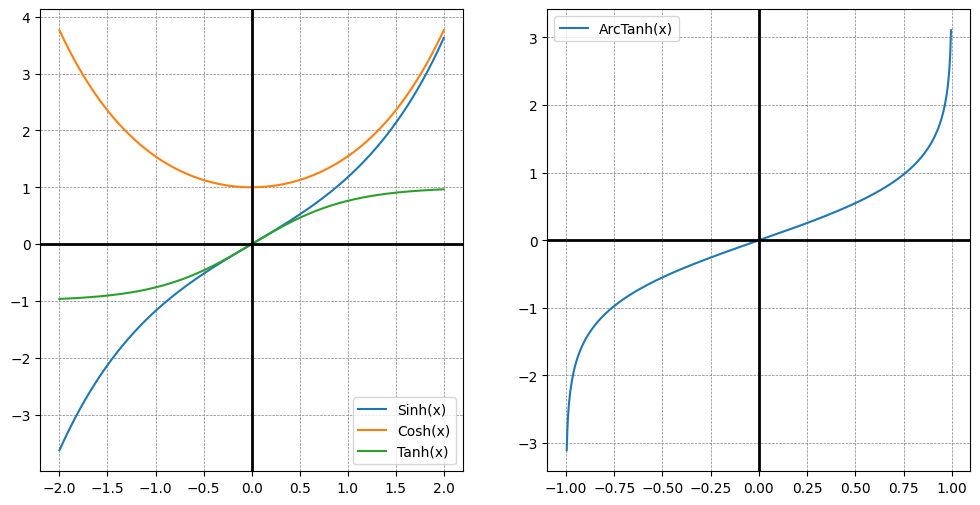

In [15]:
x = np.linspace(-2,2,1001)
sh = np.sinh(x)
ch = np.cosh(x)
th = np.tanh(x)

with np.errstate(divide='ignore', invalid='ignore'):
    ath = np.arctanh(x)
    ath[np.abs(x) >= 1] = np.nan  # Opcional: definir cómo manejar valores fuera del dominio

fig, ax = plt.subplots(1,2, figsize=(6*2,6))
ax[0].plot(x, sh, label='Sinh(x)')
ax[0].plot(x, ch, label='Cosh(x)')
ax[0].plot(x, th, label='Tanh(x)')

ax[0].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[0].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0
ax[0].grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax[0].legend()

ax[1].plot(x, ath, label='ArcTanh(x)')

ax[1].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[1].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0
ax[1].grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax[1].legend()

plt.show()



Efectos del Boost
$$
 [M_{a,\theta}]  \begin{pmatrix} k \\ \omega \end{pmatrix} = \begin{pmatrix} k_{b} \\ \omega_{b} \end{pmatrix}
$$
Se tiene 
$$
k_{b} = a (cosh(\theta)k - sinh(\theta)\omega) = 
        (a/2) [(k+\omega)e^{\theta} + (k-\omega)e^{-\theta} ]  \\
\omega_b = a (cosh(\theta)\omega - sinh(\theta)k) = 
        (a/2) [(k+\omega)e^{\theta} + (\omega - k)e^{-\theta} ] 
$$

haciendo que donde  
$k = \omega \rightarrow k_b = \omega_b$  
y    
$k = -\omega \rightarrow k_b = -\omega_b$,  
es decir, se conservan las diagonales.

Se puede comprobar dónde $k_b$ y $\omega_b$ son constantes haciendo  
$dk_b = 0 = (\partial k_b / \partial k)dk + (\partial k_b / \partial \omega)d\omega$  
$d\omega_b = 0 = (\partial \omega_b / \partial k)dk + (\partial \omega_b / \partial \omega)d\omega$  
obteniendo:  
$k_b$ constante en $\omega = tanh(\theta)^{-1} k + Cte$  
$\omega_b$ constante en $\omega = tanh(\theta) k + Cte$  
el ángulo entre las líneas $k_b$ constantes y $\omega_b$ constantes varía con $\theta$ 

In [16]:
def boost_grid(om, kx, a, theta):
    KX, OM = np.meshgrid(kx, om)
    M_a_theta = np.array([
        [a * np.cosh(theta), -a * np.sinh(theta)],
        [-a * np.sinh(theta), a * np.cosh(theta)]
    ])

    boosted_points = np.einsum('ij,xyj->xyi', M_a_theta, np.dstack((KX, OM)))
    return boosted_points[:, :, 0], boosted_points[:, :, 1]


In [36]:
def boost_points(om, k, a, theta):
    k_b  = a*(  k*np.cosh(theta) - om*np.sinh(theta)) 
    om_b = a*( om*np.cosh(theta) -  k*np.sinh(theta)) 
    
    return k_b, om_b

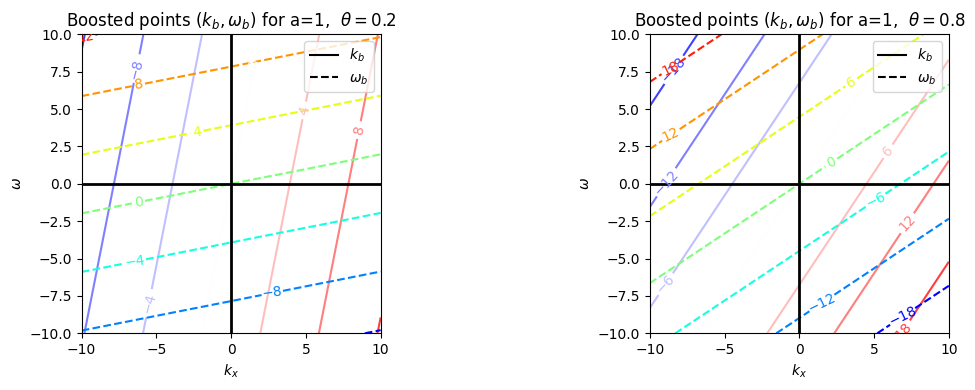

In [38]:
N = 512

# create Cartesian wavenumber-frequency space
om = np.linspace(-10, 10, N)
kx = np.linspace(-10, 10, N)
KX, OM = np.meshgrid(kx, om)

a1, th1 = 1, 0.2
a2, th2 = 1, 0.8

KB1, OMB1 = boost_points(OM, KX, a=a1, theta=th1)
KB2, OMB2 = boost_points(OM, KX, a=a2, theta=th2)

# Crear la figura y los ejes
fig, ax = plt.subplots(1,2, figsize=(12, 4))  # 4*3 = 12 para mantener la proporción

# Dibujar los contornos
c0 = ax[0].contour(kx, om, KB1, cmap='bwr', linestyles='-')
c1 = ax[0].contour(kx, om, OMB1, cmap='jet', linestyles='--')
c2 = ax[1].contour(kx, om, KB2, cmap='bwr', linestyles='-')
c3 = ax[1].contour(kx, om, OMB2, cmap='jet', linestyles='--')

# Añadir etiquetas a los contornos
ax[0].clabel(c0, inline=1, fontsize=10)
ax[0].clabel(c1, inline=1, fontsize=10)
ax[1].clabel(c2, inline=1, fontsize=10)
ax[1].clabel(c3, inline=1, fontsize=10)

# Añadir líneas en x=0 e y=0
ax[0].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[0].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0
ax[1].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[1].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0

# Configurar el título y las etiquetas de los ejes
ax[0].set_title(rf'Boosted points $(k_b, \omega_b)$ for a={a1},  $\theta = {th1:0.1f}$')
ax[0].set_xlabel(r'$k_x$')
ax[0].set_ylabel(r'$\omega$')
ax[1].set_title(rf'Boosted points $(k_b, \omega_b)$ for a={a1},  $\theta = {th2:0.1f}$')
ax[1].set_xlabel(r'$k_x$')
ax[1].set_ylabel(r'$\omega$')

# Configurar la relación de aspecto de los ejes para que sea igual
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

handles = [
    plt.Line2D([], [], color='black', linestyle='-', label=r'$k_b$'),
    plt.Line2D([], [], color='black', linestyle='--', label=r'$\omega_b$')
]
ax[0].legend(handles=handles)
ax[1].legend(handles=handles)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se ve que un $\theta$ mas grande, estrecha más el dominio hacia la diagonal.

# Difeomorfismo
El difeomorfismo cambia el espacio $(k, \omega)$ y obtiene :
+ para el campo lejano: (Ad = $\sqrt{k^2-\omega^2}$, Th=$arctanh(\omega/k)$)  
+ para el campo cercano: (Ad = $\sqrt{\omega^2 - k^2}$, Th=$arctanh(k/\omega)$)

Cuando aplicamos boostlets, no se aplica el difeomorfismo en $(k, \omega)$ si no en los puntos "boosted" $(k_b, \omega_b) = M_{a,\theta}(k, \omega)$.  
En el difeomorfismo, Ad = $\sqrt{k_b^2-\omega_b^2}$  
Usando $ch(x) = 1 + sh(x)$, se obtiene: 
- $Ad = a\sqrt{k^2-\omega^2}$  que no depende de $\theta$

Para la Scaling function se usa phi = MeyerScalingFun(N,Ad), por lo que la scaling function no depende de $\theta$, solo de la posición $(k, \omega)$ y de "a" la scale que esté usando para la descomposición.  
Ad vendría a ser el parámetro a "dilated".


Ahora el difeomorfismo.  
Cono vertical:
Ad = $\sqrt{(\omega_{b})^{2} - (k_{b})^{2}}$ = $\sqrt{\omega^{2} - k^{2}}$  
Th = arctanh($\frac{k_b}{\omega_{b}} $)  
Cono vertical: $| \omega_b | > |k_b|$ 


Cono horizontal:
Ad = $\sqrt{ (k_{b})^{2} - (\omega_{b})^{2}}$ = $\sqrt{k^{2} - \omega^{2}}$  
Th = arctanh($\frac{\omega_{b}}{k_b} $)  
$\omega_b$ / $k_b$ tiene que estar entre -1 y 1, ya que la arctanh no admite otros argumentos  entonces:  
Cono horizontal: $| \omega_b | < |k_b|$ 




In [40]:
def diff_hor_cone(k, om):
    """
    Ad no no depende de theta. No lo defino para k==om incluido (k=0, om=0)
    Th es:
       inf en k==om 
      -inf para k==-om
       nan para k=om=0
    """
    # Crear una máscara para el caso cuando |k| > |om|
    hor_cone = np.abs(k)>np.abs(om)
    
    Ad = np.sqrt(np.abs(k**2 - om**2))*hor_cone

    # Lo que está en el cono horiz lo dejo tal cual el resto lo pongo en 0 (arctanh no quiere 1, o -1)
    ratio = np.divide(om, k, where=(k != 0))*hor_cone + np.zeros_like(k)*(~hor_cone)

    Th = np.arctanh(ratio)  # Calcula Th evitando la división por cero
    Th[~hor_cone] = 0  # Asignar 0 fuera del cono

    return Ad, Th

def diff_ver_cone(k, om):
    Ad, Th = diff_hor_cone(k=om, om=k)
    return Ad, Th

def diffeo(k, om):
    a_v, th_v = diff_ver_cone(k, om)
    a_h, th_h = diff_hor_cone(k, om)
    
    return a_v+a_h, th_v+th_h



## Ad(k $\omega$) tesela en hipérbolas en los conos horizontales y verticales

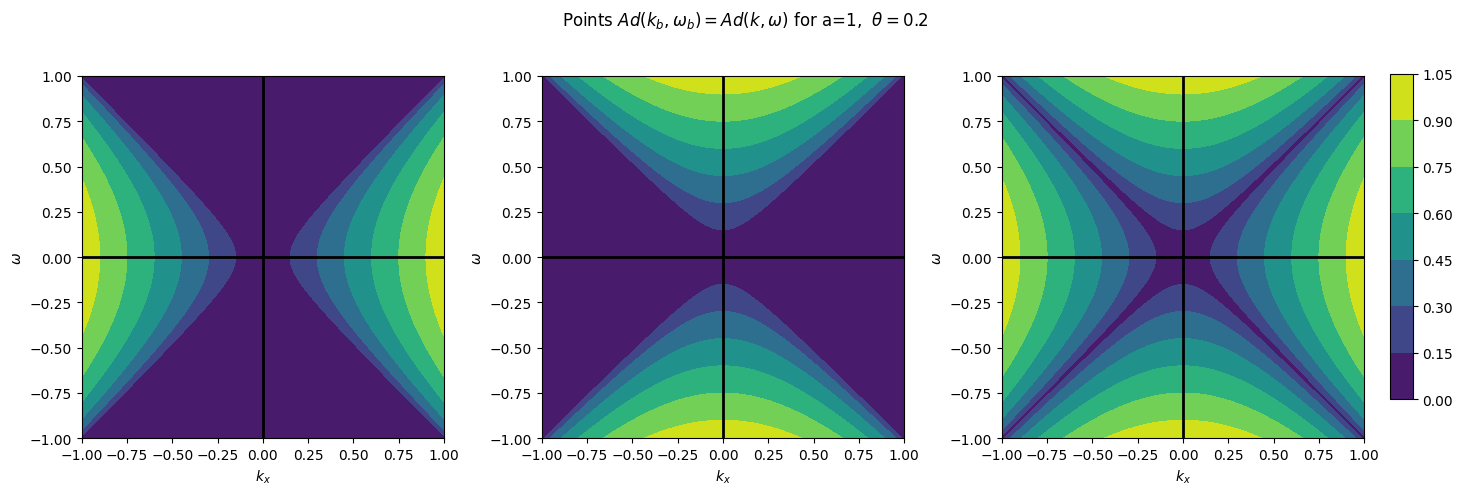

In [42]:
import matplotlib.gridspec as gridspec

N = 129
# create Cartesian wavenumber-frequency space
om = np.linspace(-1, 1, N)
kx = np.linspace(-1, 1, N)
KX, OM = np.meshgrid(kx, om)

Adh, Thh = diff_hor_cone(KX, OM)
Adv, Thv = diff_hor_cone(OM, KX)

fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])

# Crear subtramas y gráficos de contorno
data = [Adh, Adv, Adh + Adv]
axes = [fig.add_subplot(gs[0, i]) for i in range(len(data))]
contours = [ax.contourf(KX, OM, d) for ax, d in zip(axes, data)]

# Configurar las subtramas
for ax, contour in zip(axes, contours):
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)
    ax.set_aspect('equal')
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$\omega$')

# Configurar títulos específicos
plt.suptitle(rf'Points $Ad(k_b, \omega_b)=Ad(k, \omega)$ for a={a1},  $\theta = {th1:0.1f}$')

# Ajustar el diseño
plt.tight_layout()

# Añadir el colorbar a la derecha de la tercera figura
cax = fig.add_axes([0.93, 0.2, 0.015, 0.65])  # [left, bottom, width, height]
cbar = fig.colorbar(contours[2], cax=cax)

plt.show()


## Transformaciones Ad y Th aplicadas en los puntos originales $(k, \omega)$ y en los boosted $(k_b, \omega_b)$

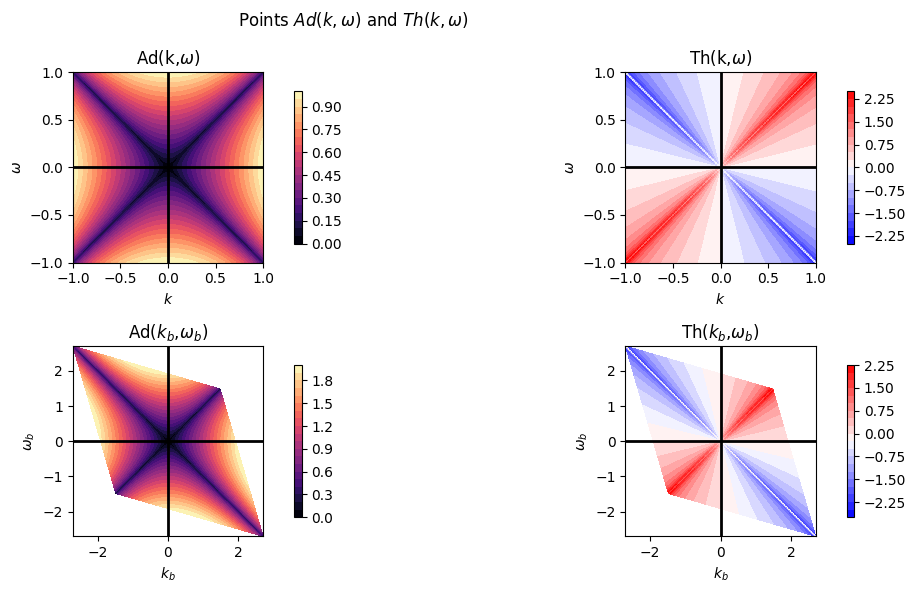

In [62]:
a1, th1 = 2, 0.3
KB1, OMB1 = boost_points(OM, KX, a=a1, theta=th1)

Ad, Th = diffeo(k=KX, om=OM)
Ad_b, Th_b = diffeo(k=KB1, om=OMB1)

# Crear subtramas y gráficos de contorno
data = [Ad, Th, Ad_b, Th_b]
titles = [r"Ad(k,$\omega$)", r"Th(k,$\omega$)", r"Ad($k_b$,$\omega_b$)", r"Th($k_b$,$\omega_b$)"]
cmaps = [ 'magma', 'bwr', 'magma', 'bwr']
xaxes = [KX, KX, KB1, KB1]
yaxes = [OM, OM, OMB1, OMB1]
x_lab = [r'$k$', r'$k$', r'$k_b$', r'$k_b$']
y_lab = [r'$\omega$', r'$\omega$', r'$\omega_b$', r'$\omega_b$']

fig, axes = plt.subplots(2, 2, figsize=(12,6))
contours = [ax.contourf(xax, yax, d, cmap=cm, levels=20) for ax, d, cm, xax, yax in zip(axes.flatten(), data, cmaps, xaxes, yaxes)]
# Configurar las subtramas y añadir colorbars
for ax, contour, title, x_l, y_l in zip(axes.flatten(), contours, titles, x_lab, y_lab):
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)
    ax.set_aspect('equal')
    ax.set_xlabel(x_l)
    ax.set_ylabel(y_l)
    ax.set_title(title)
    cbar = fig.colorbar(contour, ax=ax, orientation='vertical', shrink=0.8)  # Ajusta shrink para tamaño
# Configurar título principal
plt.suptitle(rf'Points $Ad(k, \omega)$ and $Th(k, \omega)$ ')
# Ajustar el diseño
plt.tight_layout()  # Ajustar para evitar superposiciones
plt.show()


## ahora en 3D

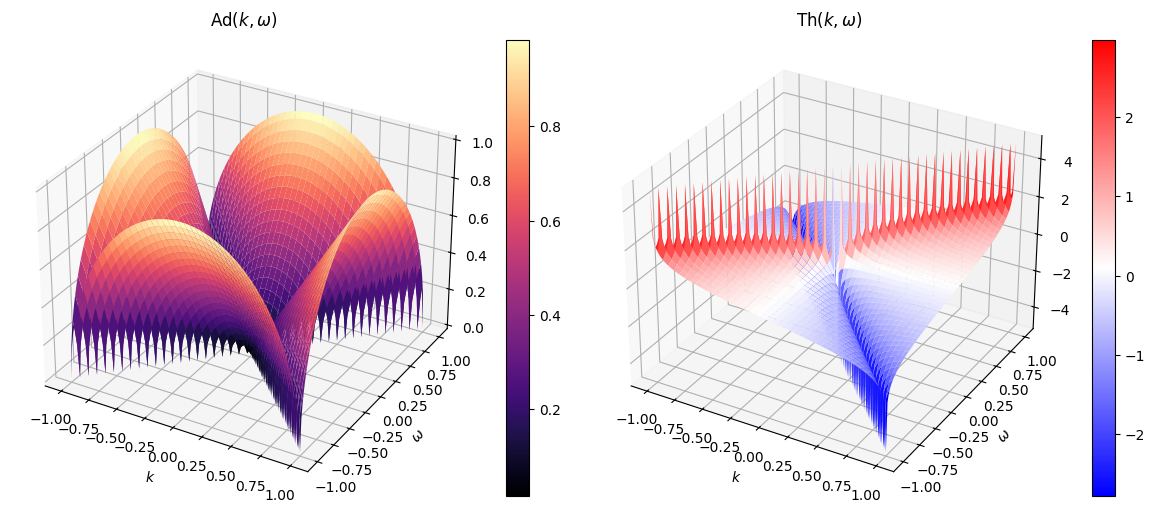

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N = 129
# create Cartesian wavenumber-frequency space
om = np.linspace(-1, 1, N)
kx = np.linspace(-1, 1, N)
KX, OM = np.meshgrid(kx, om)

Ad, Th = diffeo(k=KX, om=OM)
Th_r = np.ones_like(Th)*Th
Th_r[KX == OM] = 5
Th_r[KX == -OM] = -5

# Datos y títulos
data = [Ad, Th_r]
titles = [r"Ad$(k, \omega)$", r"Th$(k, \omega)$"]
cmaps = [ 'magma', 'bwr']

fig = plt.figure(figsize=(12, 6))
axes = [fig.add_subplot(1, len(data), i+1, projection='3d') for i in range(len(data))]
surfaces = [ax.plot_surface(KX, OM, d, cmap=cm) for ax, d, cm in zip(axes, data, cmaps)]
for ax, surface, title in zip(axes, surfaces, titles):
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$\omega$')
    # ax.set_zlabel('Value')
    ax.set_title(title)
    fig.colorbar(surface, ax=ax, orientation='vertical', shrink=0.8)  # Ajustar tamaño del colorbar
# plt.suptitle(rf'Points $Ad(k_b, \omega_b)=Ad(k, \omega)$ for a={a1},  $\theta = {th1:0.1f}$')
plt.tight_layout()
plt.show()



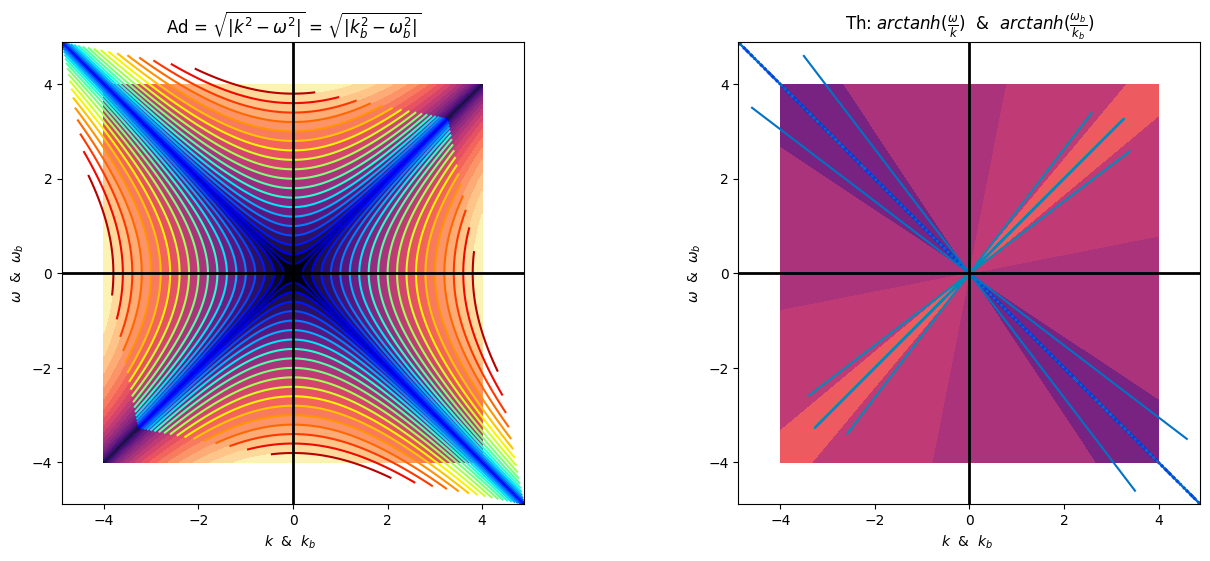

In [68]:
N = 512
om = np.linspace(-4, 4, N)
kx = np.linspace(-4, 4, N)

a1, th1 = 1, 0.2
KX, OM = np.meshgrid(kx, om)
KB1, OMB1 = boost_points(OM, KX, a=a1, theta=th1)
Ad1, Th1 = diffeo(k=KB1, om=OMB1)

fig, axs = plt.subplots(1, 2, figsize=(16,6))

filled_cont = axs[0].contourf(KX, OM, Ad1, cmap="magma", levels=20) 
line_cont = axs[0].contour(KB1, OMB1, Ad1, cmap="jet", levels=20) 

filled_cont_th = axs[1].contourf(KX, OM, Th1, cmap="magma", levels=[-10, -5, -1, 0, 1, 5 ,10]) 
line_cont_th = axs[1].contour(KB1, OMB1, Th1, cmap="winter", levels=[-10, -5, -1, 0, 1, 5 ,10]) 

for ax in axs:
    ax.axhline(0, color='black', linewidth=2)
    ax.axvline(0, color='black', linewidth=2)

    ax.set_aspect('equal')
    ax.set_xlabel(r'$k$  &  $k_b$  ')
    ax.set_ylabel(r'$\omega$  &  $\omega_b$')

axs[0].set_title(r"Ad = $\sqrt{|k^2 - \omega^2|}$ = $\sqrt{|k_b^2 - \omega_b^2|}$")
axs[1].set_title(r"Th: $arctanh(\frac{\omega}{k})$  &  $arctanh(\frac{\omega_b}{k_b})$")

plt.show()



# Distribucion de $\theta$

In [75]:
from boostlets_mod import psi_1_fou, psi_2_fou, meyerScalingFun, meyerWaveletFun

def ang_segmento(n_ondas):
    return np.pi/4/n_ondas

def ang_centros(n_ondas):
    d_alp = ang_segmento(n_ondas)
    indxs = np.arange(1,n_ondas+1)
    phis = np.pi/4 - (2*indxs - 1)*d_alp
    return phis

def theta_dist(n_ondas):
    phis = ang_centros(n_ondas)
    m = np.tan(phis)
    h_thetas = np.log(1+m)/2 - np.log(1-m)/2
    return h_thetas

def boost_points(om, k, a, theta):
    k_b  = a*(  k*np.cosh(theta) - om*np.sinh(theta)) 
    om_b = a*( om*np.cosh(theta) -  k*np.sinh(theta)) 
    
    return k_b, om_b


def get_boostlet_h(om, kx, a_i, theta_j, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun):
    KX_b, OM_b = boost_points(om, kx, a_i, theta_j)
    Ad_h, Th_h = diff_hor_cone(k=KX_b, om=OM_b)
    Phi = wavelet_fun(Ad_h)*scaling_fun(Th_h)
    Phi /= np.max(np.abs(Phi)) 
    return Phi, KX_b, OM_b

def get_boostlet_v(om, kx, a_i, theta_j, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun):
    KX_b, OM_b = boost_points(om, kx, a_i, theta_j)
    Ad_h, Th_h = diff_ver_cone(k=KX_b, om=OM_b)
    Phi = wavelet_fun(Ad_h)*scaling_fun(Th_h)
    Phi /= np.max(np.abs(Phi)) 
    return Phi, KX_b, OM_b


def boostlets_syst(M, N, n_a, n_thetas, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun ):
    """ 
    a_grid = 2 ** np.arange(S)
    theta_grid = np.linspace(-np.pi/2, np.pi/2, n_thetas)
    """
    S = n_a
    a_grid = 2 ** np.arange(S)
    theta_grid = theta_dist(n_ondas=n_thetas)

    n_boostlets = 2*len(a_grid)*len(theta_grid) + 1

    om = np.linspace(-1, 1, M)
    kx = np.linspace(-1, 1, N)

    # Primero, la función de escala (boost_type=1)
    # phi0 = genBoostlet(N, a_i = S-1, theta_j=0.0, far_or_near=0, boost_type=1)[0]

    Psi = np.zeros((M, N, n_boostlets), dtype=complex)
    Psi[:,:,0] = np.zeros((M,N))

    # Cono horizontal
    count=1
    for a_i in a_grid:
        for theta_j in theta_grid:
            phi = get_boostlet_h(om=om, kx=kx, a_i=a_i, theta_j=theta_j, wavelet_fun=wavelet_fun, scaling_fun=scaling_fun)[0]
            Psi[:,:,count] = phi
            count += 1

    # Cono vertical 
    for a_i in a_grid:
        for theta_j in theta_grid:
            phi = get_boostlet_v(om=om, kx=kx, a_i=a_i, theta_j=theta_j, wavelet_fun=wavelet_fun, scaling_fun=scaling_fun)[0]
            Psi[:,:,count] = phi
            count += 1

    Phi = np.sum(Psi**2, axis=2)
    mask = (Phi == 0.0)
    Psi[:,:,0] = np.ones_like(Phi)*mask

    Phi = np.sum(Psi**2, axis=2)
    Psi /= np.sqrt(Phi)[:, :, np.newaxis]  
    
    return Psi 



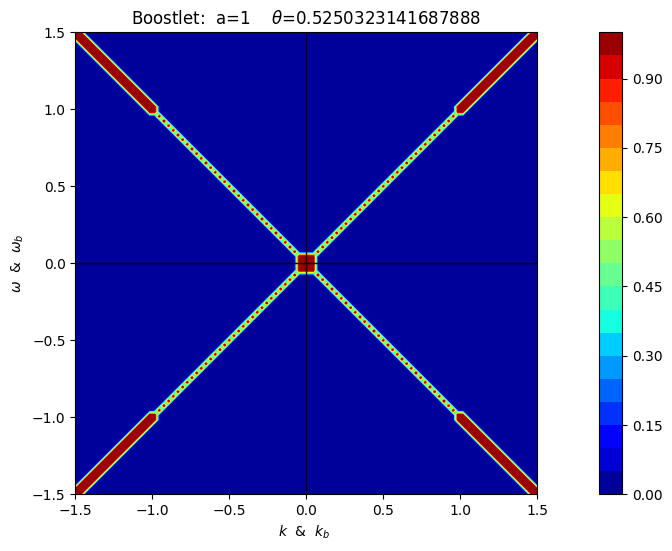

In [77]:

a_i = 1 
n_ondas = 7

ii=1
thetas = theta_dist(n_ondas=n_ondas)
theta_j = thetas[ii]

om = np.linspace(-1.5, 1.5, 100)
kx = np.linspace(-1.5, 1.5, 100)

# Phi, _, _ = get_boostlet_h(om=om, kx=kx, a_i=a_i, theta_j=theta_j, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun)
# Phi, _, _ = get_boostlet_v(kx=kx, om=om, a_i=a_i, theta_j=theta_j, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun)

# Psi = boostlets_syst(100, 100, n_a=3, n_thetas=n_ondas, wavelet_fun=meyerWaveletFun, scaling_fun=meyerScalingFun )

Psi = boostlets_syst(100, 100, n_a=5, n_thetas=n_ondas, wavelet_fun=psi_1_fou, scaling_fun=psi_2_fou )
Phi = Psi[:,:,0]
# Phi = np.sum(Psi**2, axis=2)  


fig, ax = plt.subplots(1, 1, figsize=(16,6))
filled_cont = ax.contourf(kx, om, np.abs(Phi), cmap="jet", levels=20) 
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$k$  &  $k_b$  ')
ax.set_ylabel(r'$\omega$  &  $\omega_b$')
ax.set_title(rf"Boostlet:  a={a_i}    $\theta$={theta_j}")
fig.colorbar(filled_cont, ax=ax, orientation='vertical')
plt.show()



In [ ]:

Psi = boostlets_syst(100, 100, n_a=1, n_thetas=n_ondas, wavelet_fun=MeyerWaveletFun, scaling_fun=MeyerScalingFun )
Phi = np.sum(Psi**2, axis=2)  
print(Phi.shape)



In [ ]:
n_ondas=3
d_alp = ang_segmento(n_ondas)


phis = np.pi/4 - (np.arange(1,n_ondas+1,2)*2-1) *d_alp

print(d_alp)
print(phis)



In [ ]:

print(np.arange(1,n_ondas+1)*2-1)



In [ ]:


# Crear la figura y los ejes
fig, ax = plt.subplots(1,2, figsize=(12, 4))  # 4*3 = 12 para mantener la proporción

# Dibujar los contornos
c0 = ax[0].contour(kx, om, Ad1, cmap='bwr', linestyles='-')
c1 = ax[0].contour(kx, om, Th1, cmap='jet', linestyles='--')
c2 = ax[1].contour(kx, om, Ad2, cmap='bwr', linestyles='-')
c3 = ax[1].contour(kx, om, Th2, cmap='jet', linestyles='--')

# Añadir etiquetas a los contornos
ax[0].clabel(c0, inline=1, fontsize=10)
ax[0].clabel(c1, inline=1, fontsize=10)
ax[1].clabel(c2, inline=1, fontsize=10)
ax[1].clabel(c3, inline=1, fontsize=10)

# Añadir líneas en x=0 e y=0
ax[0].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[0].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0
ax[1].axhline(0, color='black', linewidth=2)  # Línea horizontal en y=0
ax[1].axvline(0, color='black', linewidth=2)  # Línea vertical en x=0

# Configurar el título y las etiquetas de los ejes
ax[0].set_title(rf'Boosted points $(k_b, \omega_b)$ for a={a1},  $\theta = {th1:0.1f}$')
ax[0].set_xlabel(r'$k_x$')
ax[0].set_ylabel(r'$\omega$')
ax[1].set_title(rf'Boosted points $(k_b, \omega_b)$ for a={a1},  $\theta = {th2:0.1f}$')
ax[1].set_xlabel(r'$k_x$')
ax[1].set_ylabel(r'$\omega$')

# Configurar la cuadrícula
# ax[0].grid(True)
# ax[1].grid(True)

# Configurar la relación de aspecto de los ejes para que sea igual
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

handles = [
    plt.Line2D([], [], color='black', linestyle='-', label=r'$k_b$'),
    plt.Line2D([], [], color='black', linestyle='--', label=r'$\omega_b$')
]
ax[0].legend(handles=handles)
ax[1].legend(handles=handles)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Difeomorfismo

In [ ]:
Ad_v, Th_v = computeDiffeo(OM_atheta, KX_atheta, vert_hor_cone=0)
Ad_h, Th_h = computeDiffeo(OM_atheta, KX_atheta, vert_hor_cone=1)

fig, ax = plt.subplots(2, 4, figsize=(8*2, 8))
c0 = ax[0,0].pcolor(kx, om, Ad_v.real, shading='auto', cmap='bwr')
c1 = ax[0,1].pcolor(kx, om, Ad_v.imag, shading='auto', cmap='bwr')
ax[0,0].set_title(r'$\mathcal{R}$ (Ad_v)')
ax[0,1].set_title(r'$\mathcal{I}$ (Ad_v)')
ax[0,0].set_xlabel('$k_x$')
ax[0,0].set_ylabel(r'$\omega$')
ax[0,1].set_xlabel('$k_x$')
ax[0,1].set_ylabel(r'$\omega$')

c2 = ax[1,0].pcolor(kx, om, Ad_h.real, shading='auto', cmap='bwr')
c3 = ax[1,1].pcolor(kx, om, Ad_h.imag, shading='auto', cmap='bwr')
ax[1,0].set_title(r'$\mathcal{R}$ (Ad_h)')
ax[1,1].set_title(r'$\mathcal{I}$ (Ad_h)')
ax[1,0].set_xlabel('$k_x$')
ax[1,0].set_ylabel(r'$\omega$')
ax[1,1].set_xlabel('$k_x$')
ax[1,1].set_ylabel(r'$\omega$')

c4 = ax[0,2].pcolor(kx, om, Th_v.real, shading='auto', cmap='bwr')
c5 = ax[0,3].pcolor(kx, om, Th_v.imag, shading='auto', cmap='bwr')
ax[0,2].set_title(r'$\mathcal{R}$ (Th_v)')
ax[0,3].set_title(r'$\mathcal{I}$ (Th_v)')
ax[0,2].set_xlabel('$k_x$')
ax[0,3].set_ylabel(r'$\omega$')
ax[0,3].set_xlabel('$k_x$')
ax[0,1].set_ylabel(r'$\omega$')

c6 = ax[1,2].pcolor(kx, om, Th_h.real, shading='auto', cmap='bwr')
c7 = ax[1,3].pcolor(kx, om, Th_h.imag, shading='auto', cmap='bwr')
ax[1,2].set_title(r'$\mathcal{R}$ (Th_h)')
ax[1,3].set_title(r'$\mathcal{I}$ (Th_h)')
ax[1,2].set_xlabel('$k_x$')
ax[1,2].set_ylabel(r'$\omega$')
ax[1,3].set_xlabel('$k_x$')
ax[1,3].set_ylabel(r'$\omega$')

fig.colorbar(c0, ax=ax[0,0], orientation='vertical')
fig.colorbar(c1, ax=ax[0,1], orientation='vertical')
fig.colorbar(c2, ax=ax[1,0], orientation='vertical')
fig.colorbar(c3, ax=ax[1,1], orientation='vertical')
fig.colorbar(c4, ax=ax[0,2], orientation='vertical')
fig.colorbar(c5, ax=ax[0,3], orientation='vertical')
fig.colorbar(c6, ax=ax[1,2], orientation='vertical')
fig.colorbar(c7, ax=ax[1,3], orientation='vertical')

plt.tight_layout()
plt.show()


La matriz [$M_{a,\theta}$] que produce la transformacion boost en los puntos ($k_x, \omega$) es:
$$
M_{a,\theta} = a \begin{pmatrix} 
\cosh(\theta) & -\sinh(\theta) \\ 
-\sinh(\theta) & \cosh(\theta) 
\end{pmatrix}
$$

Para 
$$
 [M_{a,\theta}]  \begin{pmatrix} k_x \\ \omega \end{pmatrix} = \begin{pmatrix} k_{x,b} \\ \omega_{b} \end{pmatrix}
$$

los puntos boosted tienen una dilatación con "a" indicando que para el mismo efecto con $\theta$, distintos "a" incrementan el vector por ese factor.
Distintos $\theta$ también producen vectores más grandes.  
Como se cogen $k_x$ en [-1, 1] y también $\omega$ en [-1, 1], el mayor valor para $k_{x,b}$ y $\omega_{b}$ es $a(cosh(\theta)+sinh(\theta))$ y el menos valor es el mismo pero con signo negativo.  
Este valor es $\pm e^{\theta}$ por las definiciones de cosh() y de sinh().




Aplico difeomorfismo

In [ ]:
from boostlets_mod import genBoostlet as genBoostlet1

N = 128
S = 2
n_thetas = 7

# Configurar niveles de dilatación y boost
a_grid = 2 ** np.linspace(0, S-1, S)
theta_grid = np.linspace(-np.pi/2, np.pi/2, n_thetas)  # Esto debería cambiar si S cambia


a_j = 1
theta_j = 0.4
FN = 0
# phi0, KX, OM = genBoostlet1(N, a_j, theta_j=theta_j, far_or_near=FN, boost_type=1)
phi0, KX, OM = genBoostlet(N, a_j, theta_j=theta_j, far_or_near=FN, boost_type=1)

fig, ax = plt.subplots(1, 2, figsize=(6*2, 6))
plt.suptitle(f'Scaling function for S={S} scales')

c0 = ax[0].pcolor(OM, KX, phi0.real,  shading='auto', cmap='bwr')
c1 = ax[1].pcolor(OM, KX, phi0.imag,  shading='auto', cmap='bwr')

ax[0].set_xlabel(r'$k_x$')
ax[0].set_ylabel(r'$\omega$')
ax[0].set_title(f'Parte real')

ax[1].set_xlabel(r'$k_x$')
ax[1].set_ylabel(r'$\omega$')
ax[1].set_title(f'Parte imag')

fig.colorbar(c0, ax[0], orientation='vertical')
fig.colorbar(c1, ax[1], orientation='vertical')

plt.show()




In [ ]:
N = 129
# create Cartesian wavenumber-frequency space
om = np.linspace(-1, 1, N)
kx = np.linspace(-1, 1, N)
KX, OM = np.meshgrid(kx, om)



In [ ]:
thetas = np.array([-10, -5, -1, 0, 1, 5 ,10])

Ad = np.sqrt(np.abs(KX**2 - OM**2))

# for theta in thetas:
#     Th = np.arctanh((OM+KX + np.exp(2*theta)*(OM-KX))/(OM+KX - np.exp(2*thetas)*(OM-KX)))

theta = 0.5

Th = np.arctanh((OM+KX + np.exp(2*theta)*(OM-KX))/(OM+KX - np.exp(2*theta)*(OM-KX)))

fig, ax = plt.subplots(1, 2, figsize=(6*2, 6))
plt.suptitle(f'Scaling function for S={S} scales')

c0 = ax[0].contourf(KX, OM, Ad, cmap='bwr')
c1 = ax[1].contourf(KX, OM, Ad, cmap='bwr')
cc1 = ax[1].contour(KX, OM, Th, colors='black', linewidths=3)


ax[0].set_xlabel(r'$k_x$')
ax[0].set_ylabel(r'$\omega$')
# ax[0].set_title(f'Parte real')

ax[1].set_xlabel(r'$k_x$')
ax[1].set_ylabel(r'$\omega$')
# ax[1].set_title(f'Parte imag')

fig.colorbar(c0, ax=ax[0], orientation='vertical')
fig.colorbar(c1, ax=ax[1], orientation='vertical')

plt.tight_layout()
plt.show()

